In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV # for hyperparameter tuning
import optuna as optuna # for hyperparameter tuning
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE
import shap # for model interpretability
import sys
sys.path.append('../src')
from EvaluationFunction import evaluate_model
from ValidationCross import cross_val_results
import shap

In [17]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier
pipeline = joblib.load('../models/best_model.pkl')

# Extraire le modèle XGBoost final
# Attention : utilise bien 'classifier' si c'est le nom que tu as mis dans le pipeline
xgb_final = pipeline.named_steps['classifier']

# Extraire les noms des colonnes après transformation (OneHotEncoding)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

---
Importance des features - XGBoost
---

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_16440\1981130254.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


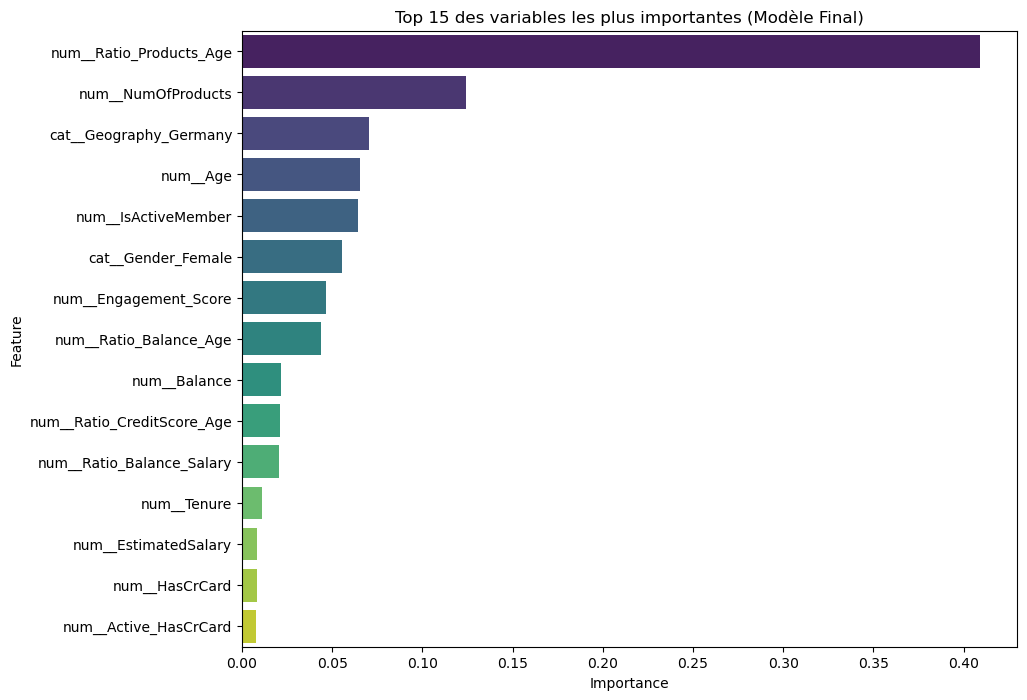

In [7]:
# Récupérer les importances
importances = xgb_final.feature_importances_

# Créer un DataFrame pour faciliter l'affichage
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 15 plus importantes
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 des variables les plus importantes (Modèle Final)')
plt.show()

##  SHAP (SHapley Additive exPlanations)

SHAP est une méthode théorique du jeu qui explique les prédictions en attribuant à chaque feature une "valeur de contribution" pour chaque prédiction. 

In [15]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
})

In [20]:
# Extraction (selon les noms définis dans ton pipeline .pkl)
preprocessor_xgb = model_pipeline.named_steps['preprocessor']
xgb_model = model_pipeline.named_steps['classifier']

# Transformation correcte des données de test
X_test_preprocessed = preprocessor_xgb.transform(X_test)
feature_names = preprocessor_xgb.get_feature_names_out()

# Conversion en DataFrame pour que SHAP affiche les noms des variables
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Création de l'explainer SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed_df)

# SHAP Summary Plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test_preprocessed_df, show=False)
plt.title("SHAP Summary Plot - Analyse Globale")
plt.tight_layout()
plt.show()

NameError: name 'X_test' is not defined

In [19]:
from lime import lime_tabular

# Transformation de X_train pour l'explainer
X_train_preprocessed = preprocessor_xgb.transform(X_train)

# Initialisation de LIME
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_preprocessed,
    feature_names=feature_names.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=42
)

# Explication d'un individu spécifique (ex: index 0)
idx = 0
print(f"🍋 Analyse LIME pour l'individu à l'index {idx}")

exp = explainer_lime.explain_instance(
    data_row=X_test_preprocessed_df.iloc[idx].values, 
    predict_fn=xgb_model.predict_proba
)

# Affichage graphique de LIME
exp.as_pyplot_figure()
plt.title(f"LIME - Explication Individuelle (Index {idx})")
plt.show()

NameError: name 'preprocessor_xgb' is not defined